Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, Derivative, lambdify

GLOBAL VARIABLES

In [2]:
FROM = 1
TO = 6

In [3]:
def f(x):
    return 2 * x ** 3 + 3 * x ** 2 - 48 * x + 13

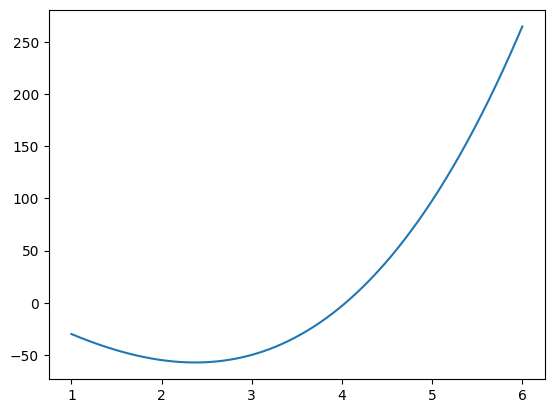

In [4]:
x = np.linspace(FROM, TO, 1000)
y = f(x)
plt.plot(x, y)
plt.show()

In [5]:
x = symbols('x')
expr = 2 * x ** 3 + 3 * x ** 2 - 48 * x + 13

expr_diff = Derivative(expr, x).doit()
f_diff = lambdify(x, expr_diff, 'numpy')
print("Value of the derivative:")
expr_diff

Value of the derivative:


6*x**2 + 6*x - 48

In [6]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if np.sign(f(a)) == np.sign(f(b)):
        raise ValueError("Function does not change sign over interval")

    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif np.sign(f(c)) == np.sign(f(a)):
            a = c
        else:
            b = c
        iter_count += 1
    return (a + b) / 2

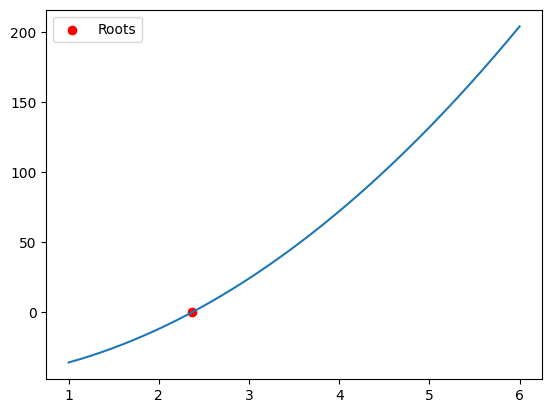

Root 1: 2.372282


In [7]:
x_values = np.linspace(FROM, TO, 1000)
y_values = [expr_diff.subs(x, val) for val in x_values]
plt.plot(x_values, y_values)
root = round(bisection_method(f_diff, 1, 6), 6)
plt.scatter(root, expr_diff.subs(x, root), color='red', label='Roots')
plt.legend()
plt.show()

print("Root 1:", root)

In [8]:
result = round(expr_diff.subs(x, root), 6)

if result > 0:
    print("extreme is minimum")
else:
    print("extreme is maximum")
    
result

extreme is minimum


2.3e-5